## Exercice 2 (4 pts)

A partir du fichier "reviews_en.csv", vous entraînerez un **modèle de classification de produits**. Avant d'entraîner votre modèle, vous vous assurerez que les données soient équilibrées à l'aide d'outils de visualisation, et à employer une méthode de votre choix pour les réequilibrer si besoin. 


Vous diviserez votre dataset de telle sorte à avoir un dataset d'entraînement, de validation et de test. Vous utiliserez les datasets de validation et de test pour contrôler la qualité de votre modèle.

Vous essaierez plusieurs types d'algorithmes. Une fois que vous aurez identifié l'algorithme le plus performant, vous utiliserez l'outil Pipeline de ``scikit_learn`` pour enregistrer ce modèle ainsi que le vectorizer sur le disque.

In [1]:
import pandas as pd

# Charger le fichier csv
df = pd.read_csv('data/reviews_en.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   texts    10000 non-null  object
 1   classes  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [3]:
df.head()

texts       classes
0  As much as I wanted to love the box it came br...     drugstore
1  The app opens and immediately crashes. Can't w...         other
2  I needed this for a project. The scroll came w...          home
3  Terrible fit in bust area; not flattering at a...       apparel
4  The filter works GREAT.... once I fixed it!!!!...  pet_products

In [80]:
df['classes'].value_counts()

classes
wireless                    999
home                        819
other                       695
beauty                      644
apparel                     620
drugstore                   603
kitchen                     537
toy                         483
lawn_and_garden             450
pc                          392
home_improvement            382
electronics                 377
automotive                  368
sports                      368
pet_products                337
grocery                     321
office_product              279
shoes                       206
jewelry                     140
furniture                   136
book                        130
baby_product                129
camera                      125
industrial_supplies         109
digital_ebook_purchase       87
digital_video_download       74
video_games                  57
musical_instruments          51
luggage                      42
watch                        36
personal_care_appliances      4


In [4]:
df['classes'].value_counts().plot.bar()
# regarder si les données sont équilibrées

<Axes: xlabel='classes'>

In [5]:
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement, de validation et de test
X_train, rest_data, y_train, y_rest = train_test_split(df['texts'], df['classes'], test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(rest_data, y_rest, test_size=0.5)


In [6]:
X_val


7457          Smells horrible , too greasy, want a refund
2075    DON'T BUY IT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
9658               it doesn't offer a broad area coverage
5183    Lens are super reflective making everything bl...
3484    Love this product. But have to rate it poorly ...
                              ...                        
9171    Very flimsy and provides minimal protection. T...
9218    My remote just stopped moving. It will allow m...
5540    Received mine dying. Definitely not worth it. ...
7425    arrived in very bad condition while the packag...
1258    a couple of days after i got my order it start...
Name: texts, Length: 1500, dtype: object

In [7]:
X_train

927     Total junk. Overpriced for what you get. Half ...
321     this part went in without issue. the fit is fi...
8328    Does not charge, broke my controllers. I plugg...
2740            Broke after 3 minutes both,my kids 7 y.o.
8032    Terrible, but I should have known since it was...
                              ...                        
3237    3.5mm jack doesnt fit properly into RCA adapte...
4625    Problem about this is it scans one thing at a ...
9830    If you buy one of these, be sure and get the o...
5294    I hate giving something a 1-star, but I want t...
1164    ordered a 9-10 for a child who is a 7. It fits...
Name: texts, Length: 7000, dtype: object

In [8]:
# Créez un vecteur TF-IDF à partir des textes
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


X_test_tfidf = vectorizer.transform(X_test)

In [9]:
print("Forme de la matrice :", X_train_tfidf.shape)

Forme de la matrice : (7000, 10238)


Nouvelle forme des données après RandomOverSampler:  (21173, 10238) (21173,)


<Axes: xlabel='classes'>

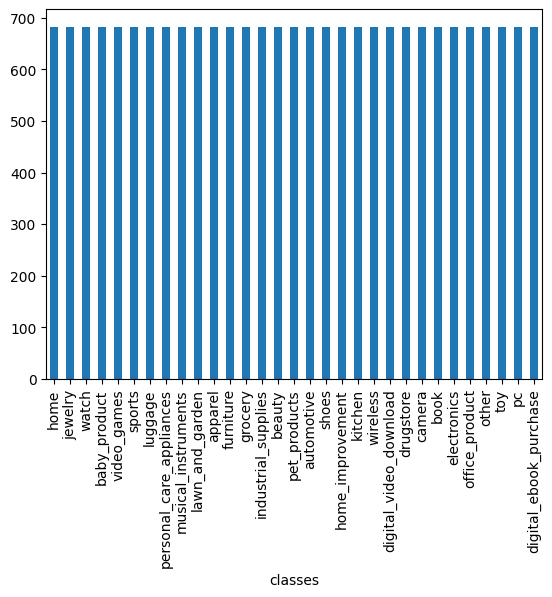

In [10]:
from imblearn.over_sampling import RandomOverSampler

# Utiliser RandomOverSampler pour réequilibrer les données
randomoversampler = RandomOverSampler(random_state = 42)
ranOver_X, ranOver_y = randomoversampler.fit_resample(X_train_tfidf, y_train)

print('Nouvelle forme des données après RandomOverSampler: ', ranOver_X.shape, ranOver_y.shape)

# Créer un DataFrame pour visualiser la distribution des classes après RandomOverSampler
Rover_y_df = pd.DataFrame(ranOver_y, columns=['classes'])
Rover_y_df['classes'].value_counts().plot.bar()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Entraîner le modèle Logistic Regression sur l'ensemble d'entraînement suréchantillonné
lr = LogisticRegression()
lr.fit(ranOver_X, ranOver_y)

# Faire des prédictions sur l'ensemble de validation
y_val_pred = lr.predict(X_val_tfidf)

In [108]:
from sklearn.metrics import accuracy_score
# Regarder la performance 
accuracy = accuracy_score(y_val, y_val_pred)

print(accuracy)

0.282


In [109]:
y_test_pred = lr.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_test_pred)

print(accuracy)

0.30866666666666664


In [122]:
# Instantier le modèle KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=50)

In [123]:
predictions = knn.predict(X_val_tfidf)
predictions

array(['wireless', 'home', 'kitchen', ..., 'drugstore', 'grocery',
       'wireless'], dtype=object)

In [124]:
from sklearn.metrics import accuracy_score
knn_acc = knn.score(X_val_tfidf, y_val)
print("Précision du modèle :", knn_acc)
# on obtient la précision du modèle KNN

Précision du modèle : 0.254


In [125]:
predictions1 = knn.predict(X_test_tfidf)
predictions1
knn_acc1 = knn.score(X_test_tfidf, y_test)
print("Précision du modèle :", knn_acc1)
# on obtient la précision du modèle KNN

Précision du modèle : 0.27266666666666667


In [128]:
from joblib import dump
import os
# sauvegarder le modèle Logistic Regression qui est plus performant

save_path = 'data/logreg_model'
if not os.path.exists(save_path):
    os.mkdir(save_path)
    
dump(vectorizer, f"{save_path}/vectorizer.joblib")
dump(lr, f'{save_path}/model.joblib')

['data/logreg_model/model.joblib']